# Fourier Transforms

Ok, here we go. 

## Sreeni's high-level explanation:
A Fourier transform acting on a recipe would be like decomposing that dish into its ingredients!

And of course, from our previous math classes, we know that we can decompose an image down into constituent sine/cosine waves:
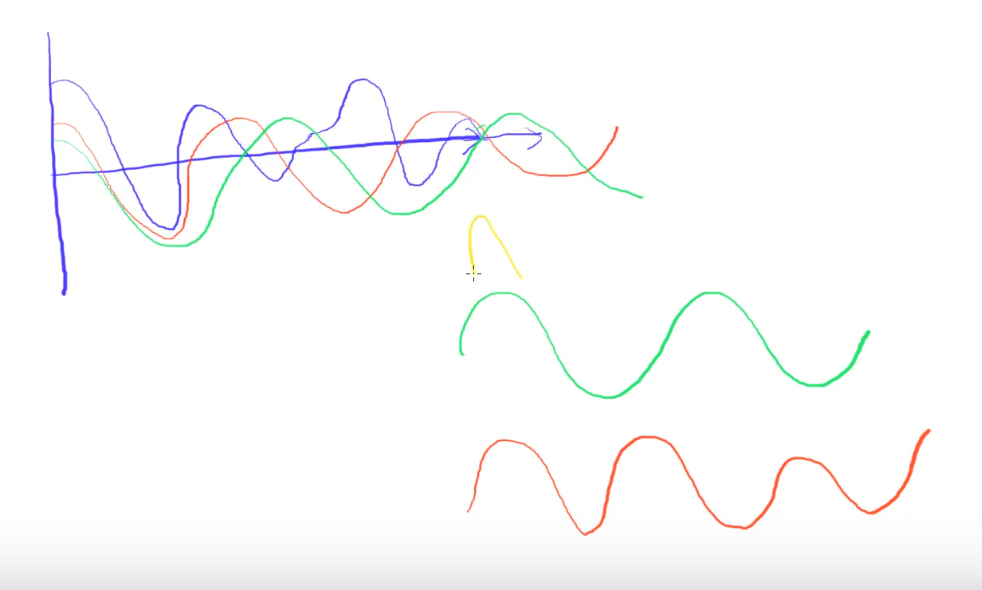

From a mathematical viewpiont, you are moving a signal from the **time domain** or the **spatial domain** to the **frequency** domain. Thus, if you had a signal that was just a single sine wave, its fourier transform would be a single peak at its corresponding frequency in the frequency domain:

For image processing purposes, we can regard our image as being the summation of many different multidimensional sine/cosine waves! That's why we can decompose images with Fourier transforms!

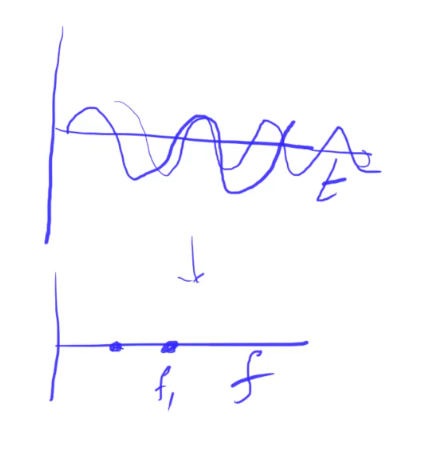

### Discrete vs. Continuous Fourier Transforms: What's the Deal?

The way we typically compute a Fourier transform function is by taking an unlimited integral over our time domain. Thus, that would be considered a **Continuous Fourier Transform**. 

Alternatively, since we are doing numerical computation, we are going to be sampling things in a discrete way. Thus, our integral turns into a summation and we compute a **Discrete Fourier Transform**. 

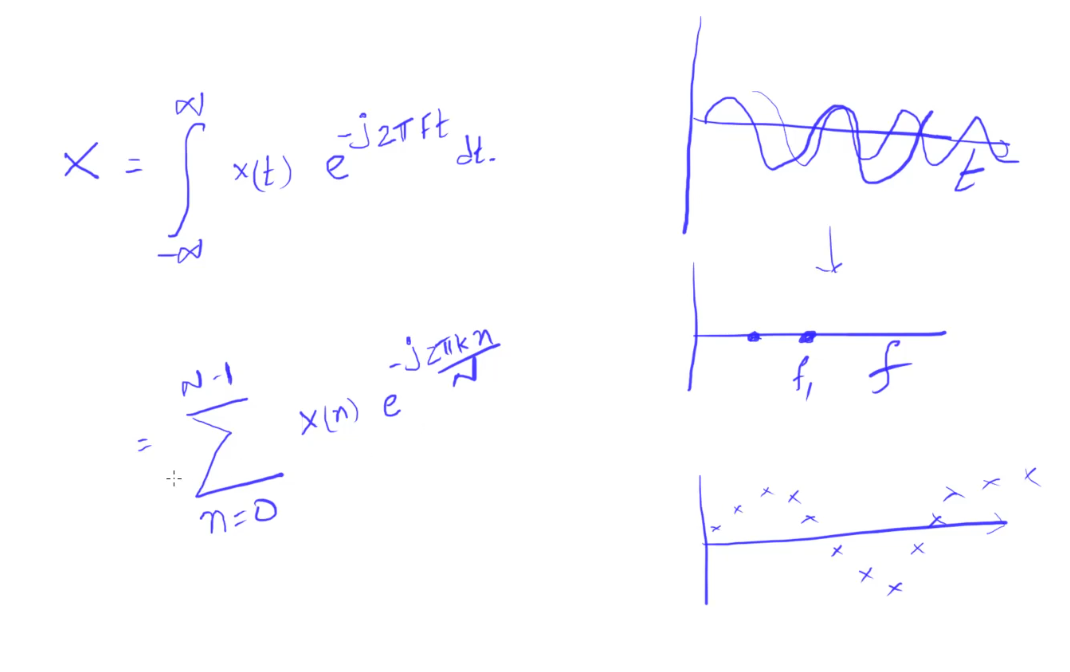

## Now for the code:

Let's start with a 2D sine wave for the sake of learning! In opencv, the discrete fourier transform is `cv2.dft`

In [5]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

#generate a 2D sine wave:
x = np.arange(256) #generate 1-D sine wave
y = np.sin(2*np.pi*x/60) #control frequency
y+=max(y) #offset sine wave by the max value to go out of negative range of sine


img = np.array([[y[j]*127 for j in range(256)] for i in range(256)],dtype=np.uint8)

#Discrete Fourier Transform (only works with float32)
#look at the documentation for more. The output will 
#have 2 channels: one real, one imaginary
dft = cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)

print("Look, it's complex! Shape = ",dft.shape)

Look, it's complex! Shape =  (256, 256, 2)


### Now we need to calculate the magnitude spectrum of the DFT, which = 20*log(DFT)* and we also need to shift our Fourier transform to visualize it

First we also have to calculate the magnitude of our DFT at each point to do this, and we can actually do that with `cv2.magnitude(real,complex)`. Note that the first channel of our DFT is the real part and the imaginary part is the 2nd channel. 

This is a math thing, don't worry about it for your image processing.

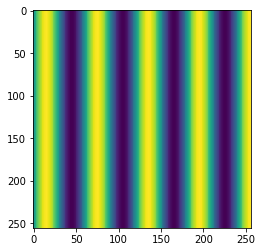

In [8]:
#shift:
dft_shift = np.fft.fftshift(dft)

magnitude = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])+1 #add 1 to avoid divide by zero errors
magnitude_spectrum = 20*np.log(magnitude)

plt.imshow(magnitude_spectrum)
plt.imshow(img)


In [9]:
magnitude_spectrum.shape

(256, 256)

# Image Filtering using Fourier Transform:



In [20]:
img_path = '/Users/matthewmiller/Desktop/sreeni_github/images/BSE_Google.jpg'
img = cv2.imread(img_path,0)
dft = cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)

#making sure that we center on our low frequencies!
dft_shift = np.fft.fftshift(dft)

#see above:
magnitude = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])+1 #add 1 to avoid divide by zero errors because can't take log of zero
magnitude_spectrum = 20*np.log(magnitude)


### Time to make a High Pass Filter

To make a High Pass Filter (HPF), we essentially need to make a mask over our low frequencies in Fourier space as such (note that the dot at the top left represents the initial center point of the unshifted Fourier transform). 
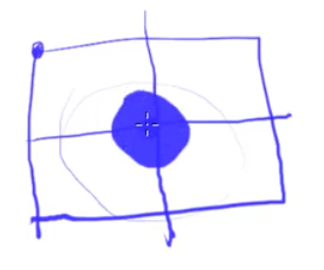

### In the below code, Sreeni also demonstrates how to make a *circular* mask in Python. Exciting!

In [25]:
rows, cols = img.shape
#Now find the center point of the image:
center_row,center_col = int(rows/2),int(cols/2)

#now initialize a mask with 2 channels (one for real, one for complex):
mask = np.ones((rows,cols,2),np.uint8)
#define the center of a circular mask!
r = 80 
center = [center_row,center_col]
x,y = np.ogrid[:rows,:cols]
mask_area = (x-center[0])**2 + (y-center[1])**2 <=r**2
mask[mask_area]=0

#now apply mask to the shifted discrete fourier transform:
fshift = dft_shift*mask

In [27]:
#now re-apply to get the magnitude spectrum:
magnitude_masked = cv2.magnitude(fshift[:,:,0],fshift[:,:,1])+1 #add 1 to avoid divide by zero errors because can't take log of zero
magnitude_spectrum_masked = 20*np.log(magnitude_masked)


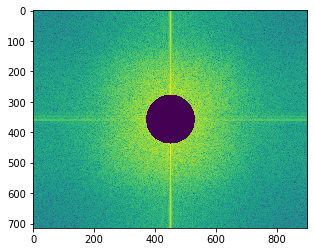

In [28]:
plt.imshow(magnitude_spectrum_masked)

## Now it is time to start bringing things back into the spatial domain. 

### 1) Let's start by unshifting the shift:
We will do this with `np.fft.iffshift(<shifted Fourier>)`

### 2) Let's move on by applying an inverse Fourier transform:
We will do this with `cv2.idft(<unshifted Fourier>)`

In [43]:
unshifted_fourier = np.fft.ifftshift(fshift)
img_back = cv2.idft(unshifted_fourier)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

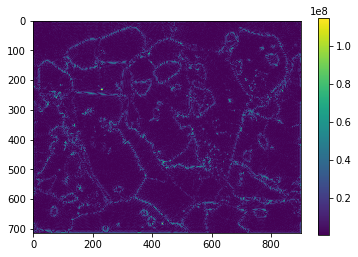

In [71]:
plt.imshow(img_back)
plt.colorbar()

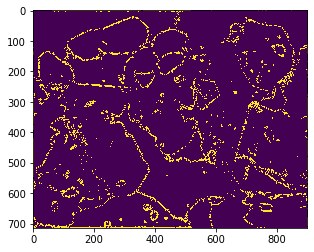

In [85]:
play = img_back.copy()/10**8
this = play>0.4
masked = np.where(play>0.15,1,0)
plt.imshow(masked)
# that = that.resize((play.shape[0],play.shape[1]))

#this = this.resize((play.shape[0],play.shape[1]))

# plt.imshow(this)
# plt.colorbar()

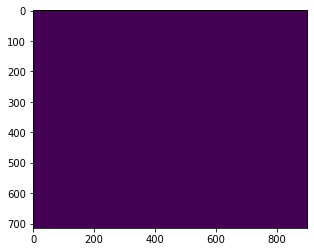

In [41]:
plt.imshow(img_back)

In [86]:
import sklearn
print(sklearn.__version__)

0.21.3
